# EDA of the Database

This notebook tries to give a visual representation of the overall data in the datbase. 

Install the required libraries by running the following command:
```python
!pip install pandas matplotlib seaborn
```

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = "C:/Users/fahim/Documents/GitHub/postgreSQL-v2-bills-maxint-app/tasks/Maxint-accounts-9999-demo.csv"
df = pd.read_csv(file_path)

In [7]:
# Display basic info
print("Basic Information:")
df.info()
print("\nFirst 15 rows:")
print(df.head(15))

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    object 
 1   createdAt          100 non-null    object 
 2   externalId         100 non-null    object 
 3   type               100 non-null    object 
 4   amount             100 non-null    float64
 5   date               100 non-null    object 
 6   description        100 non-null    object 
 7   category           100 non-null    object 
 8   counterParty       100 non-null    object 
 9   recurring          0 non-null      float64
 10  tag                100 non-null    object 
 11  accountExternalId  100 non-null    object 
 12  location           100 non-null    object 
dtypes: float64(2), object(11)
memory usage: 10.3+ KB

First 15 rows:
                                      id createdAt                 externalId  \
0   27

In [8]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
id                     0
createdAt              0
externalId             0
type                   0
amount                 0
date                   0
description            0
category               0
counterParty           0
recurring            100
tag                    0
accountExternalId      0
location               0
dtype: int64


Currently, the `recurring` column doesn't have any data at all.

In [9]:
# Summary statistics for numerical columns
print("Summary Statistics:\n")
print(df.describe())

Summary Statistics:

           amount  recurring
count  100.000000        0.0
mean    45.439800        NaN
std     99.624607        NaN
min   -604.130000        NaN
25%     25.175000        NaN
50%     67.335000        NaN
75%    100.585000        NaN
max    124.980000        NaN


In [13]:
# Convert date columns to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='coerce')
df['createdAt'] = pd.to_datetime(df['createdAt'], errors='coerce')

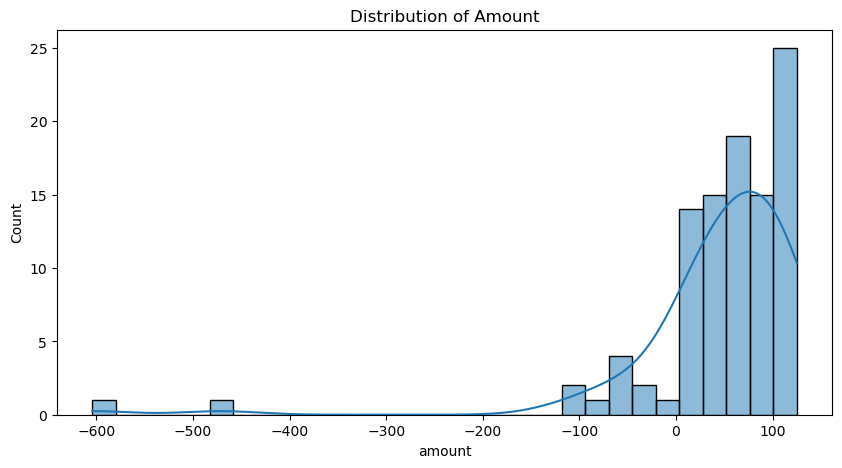

In [14]:
# Distribution of numerical features
plt.figure(figsize=(10, 5))
sns.histplot(df['amount'], bins=30, kde=True)
plt.title("Distribution of Amount")
plt.show()

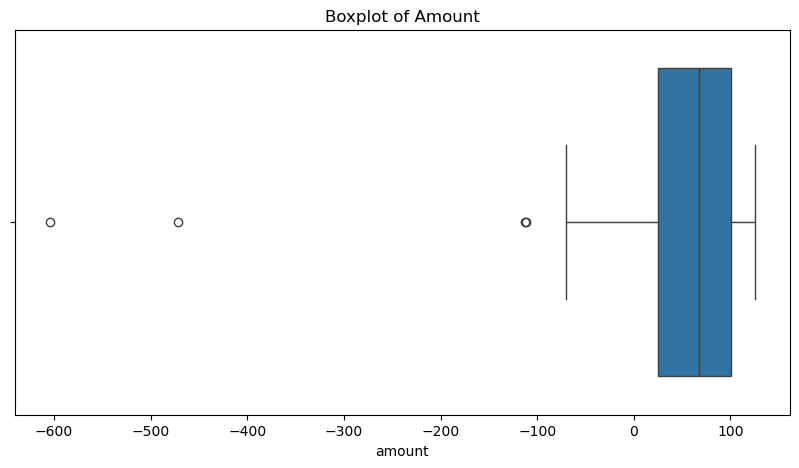

In [15]:
# Boxplot for outlier detection
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['amount'])
plt.title("Boxplot of Amount")
plt.show()

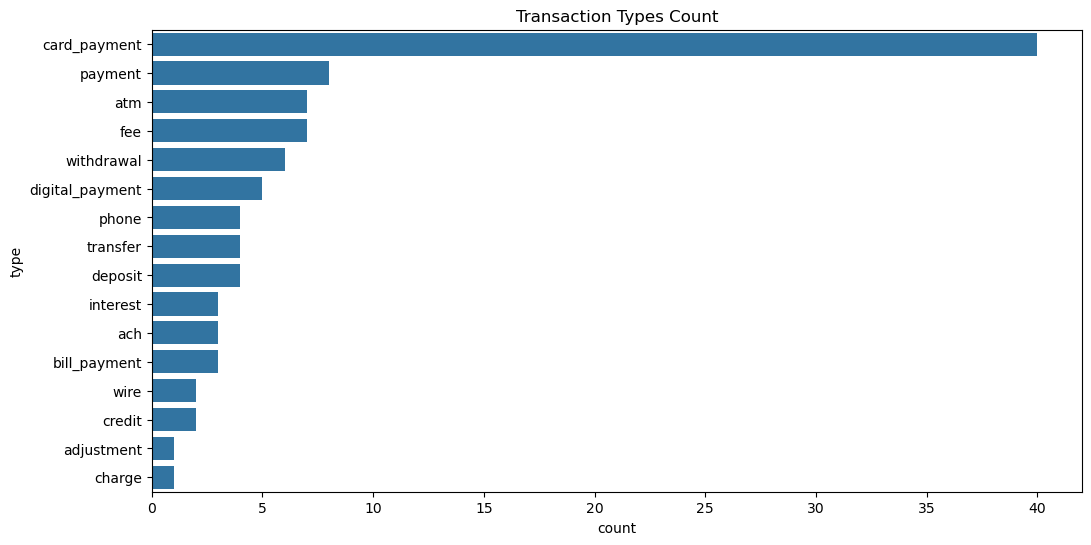

In [16]:
# Countplot of transaction types
plt.figure(figsize=(12, 6))
sns.countplot(y=df['type'], order=df['type'].value_counts().index)
plt.title("Transaction Types Count")
plt.show()

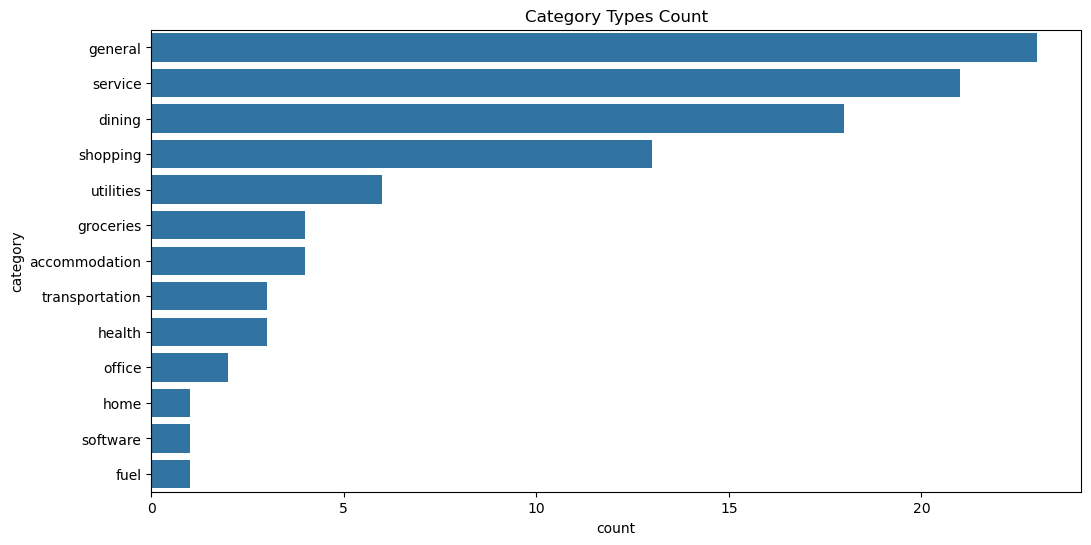

In [21]:
# Countplot of category types
plt.figure(figsize=(12, 6))
sns.countplot(y=df['category'], order=df['category'].value_counts().index)
plt.title("Category Types Count")
plt.show()

Number of unique counterParties: 57


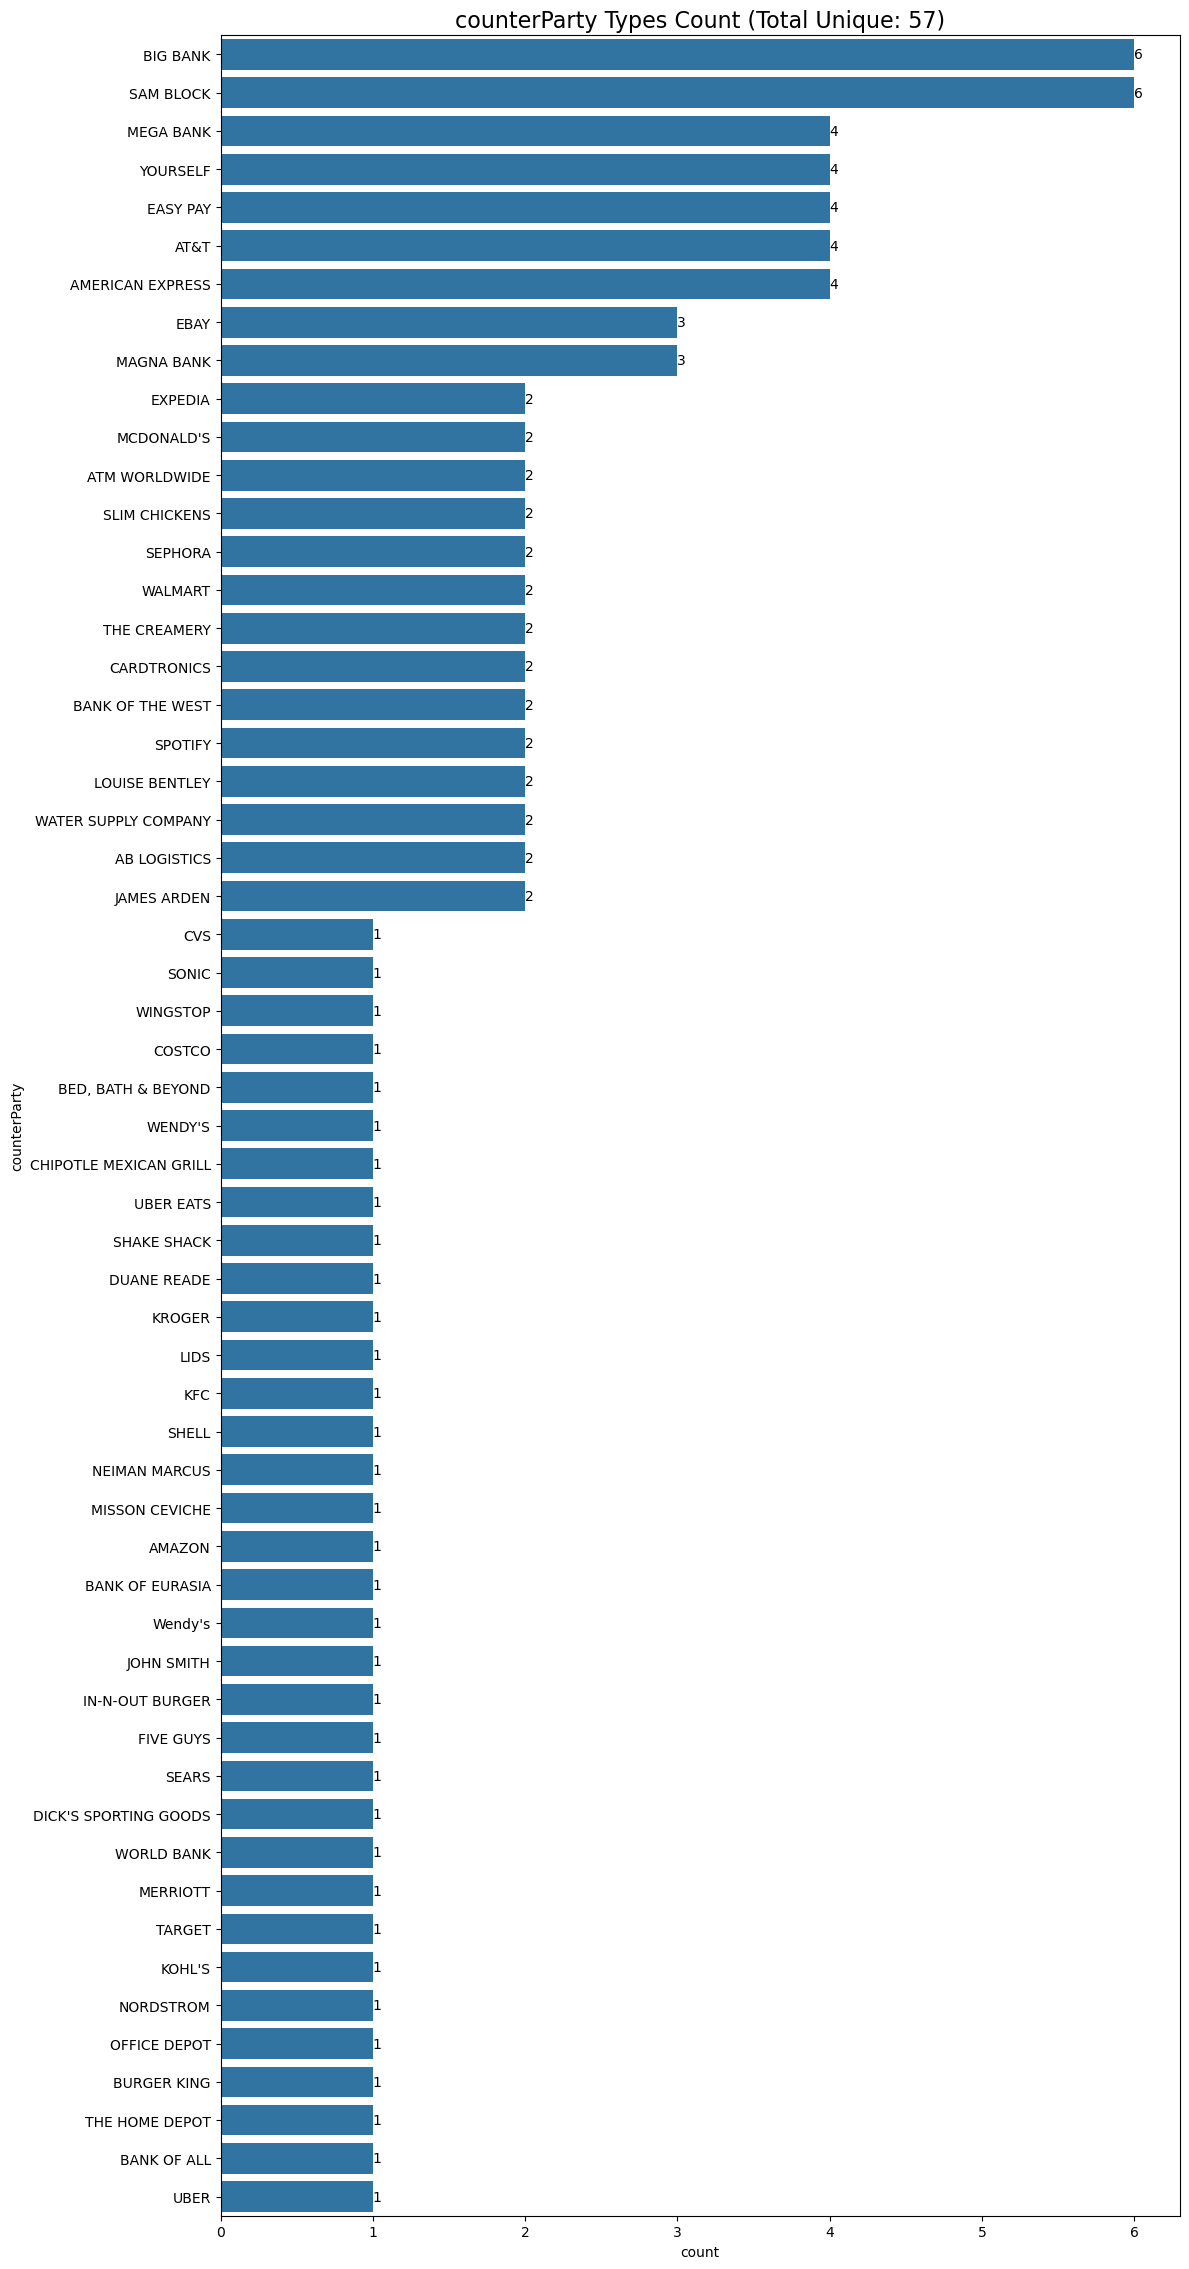

In [28]:
# Get the number of unique counterParties
n_counterParties = df['counterParty'].nunique()

# Print the number of unique counterParties
print(f"Number of unique counterParties: {n_counterParties}")

# Calculate an appropriate figure height (e.g., 0.4 inches per counterParty)
fig_height = max(12, n_counterParties * 0.4)  # Minimum height of 12 inches

# Countplot of counterParty types
plt.figure(figsize=(12, fig_height))
ax = sns.countplot(y=df['counterParty'], order=df['counterParty'].value_counts().index)
plt.title(f"counterParty Types Count (Total Unique: {n_counterParties})", fontsize=16)

# Increase font size for y-axis labels
plt.yticks(fontsize=10)

# Add count labels to the bars
for i, v in enumerate(df['counterParty'].value_counts()):
    ax.text(v, i, str(v), va='center', fontsize=10)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Save the figure before showing it
plt.savefig('counterParty Types Count.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

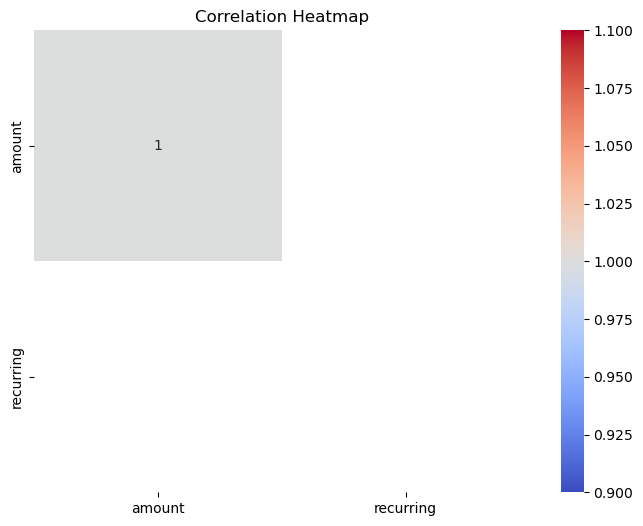

In [17]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

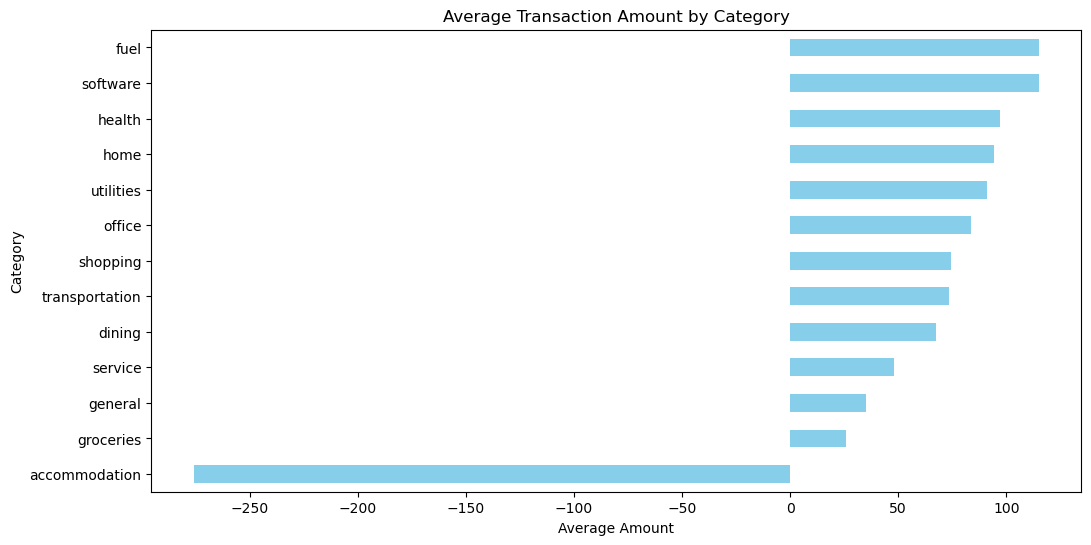

In [18]:
# Grouped analysis: Average amount per category
category_avg = df.groupby('category')['amount'].mean().sort_values()
plt.figure(figsize=(12, 6))
category_avg.plot(kind='barh', color='skyblue')
plt.xlabel("Average Amount")
plt.ylabel("Category")
plt.title("Average Transaction Amount by Category")
plt.show()

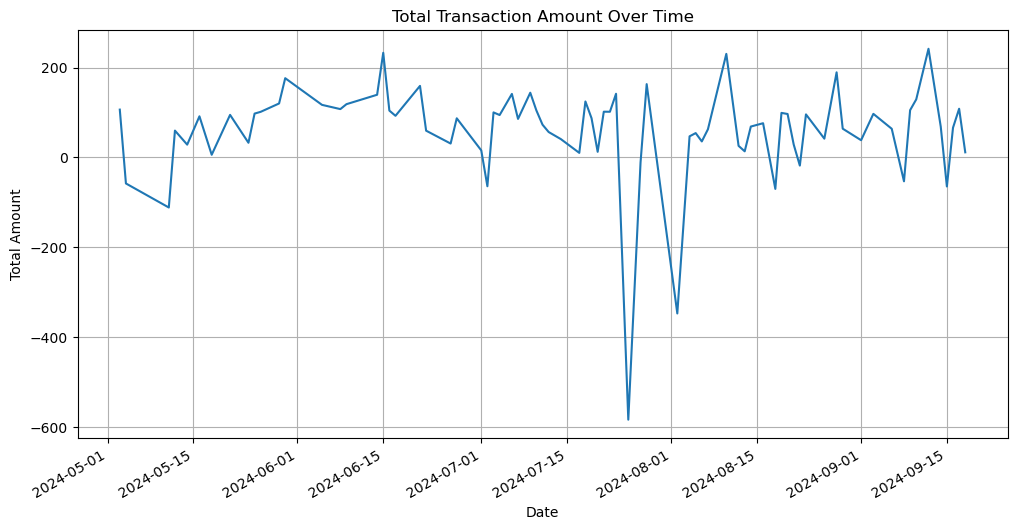

In [19]:
# Transactions over time
plt.figure(figsize=(12, 6))
df.groupby('date')['amount'].sum().plot()
plt.title("Total Transaction Amount Over Time")
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.grid()
plt.show()

Number of unique accountExternalId: 3


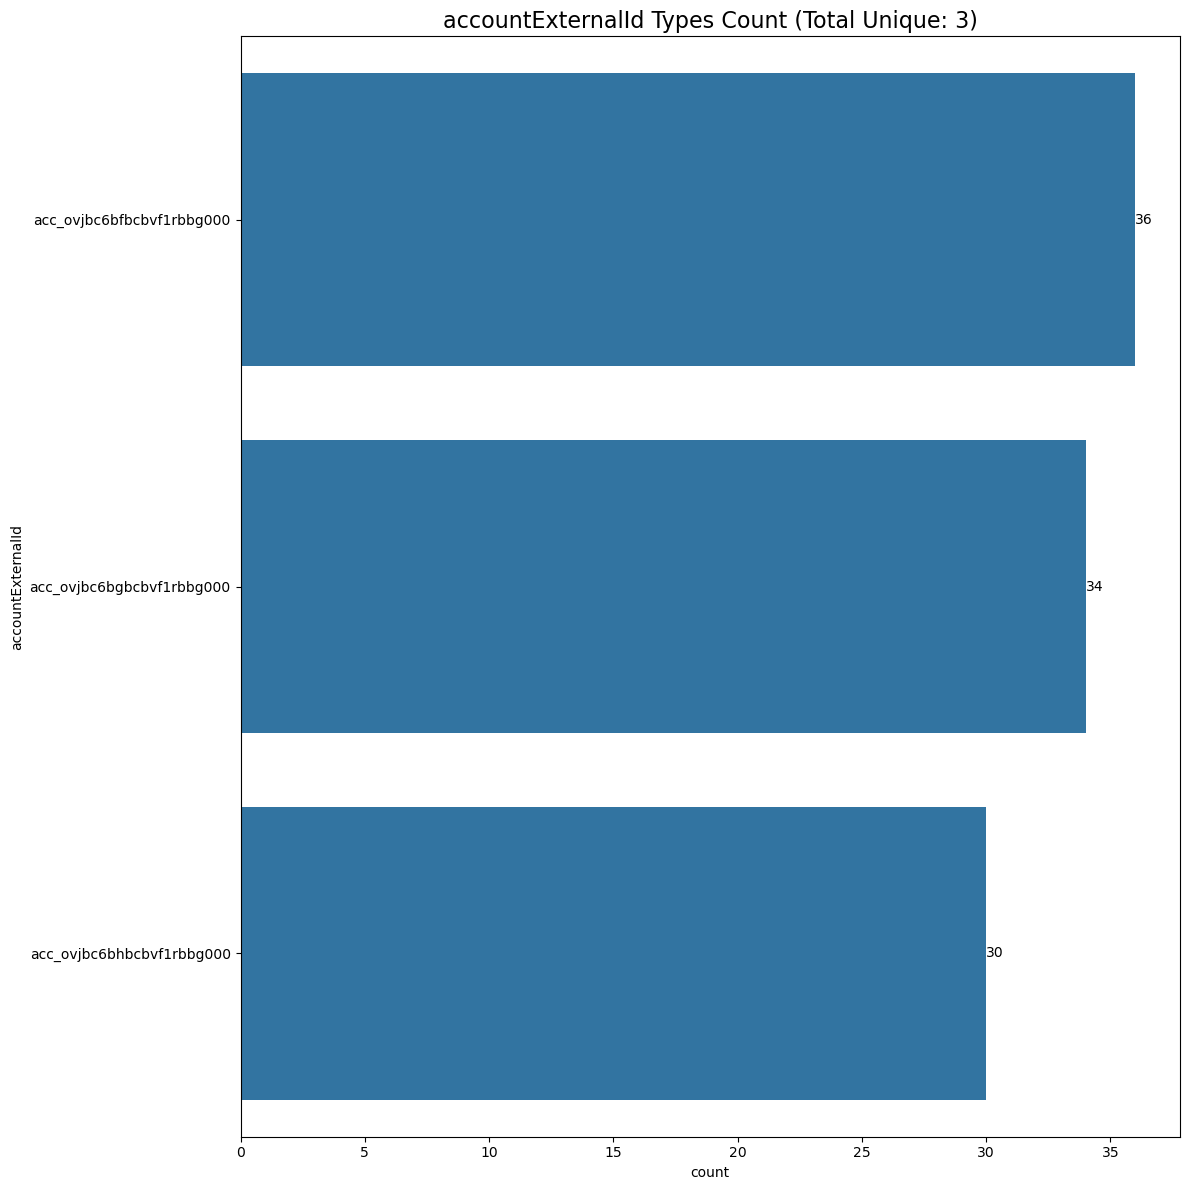

In [30]:
# Get the number of unique accountExternalId
n_accountExternalId = df['accountExternalId'].nunique()

# Print the number of unique accountExternalId
print(f"Number of unique accountExternalId: {n_accountExternalId}")

# Calculate an appropriate figure height (e.g., 0.4 inches per counterParty)
fig_height = max(12, n_accountExternalId * 0.4)  # Minimum height of 12 inches

# Countplot of accountExternalId types
plt.figure(figsize=(12, fig_height))
ax = sns.countplot(y=df['accountExternalId'], order=df['accountExternalId'].value_counts().index)
plt.title(f"accountExternalId Types Count (Total Unique: {n_accountExternalId})", fontsize=16)

# Increase font size for y-axis labels
plt.yticks(fontsize=10)

# Add count labels to the bars
for i, v in enumerate(df['accountExternalId'].value_counts()):
    ax.text(v, i, str(v), va='center', fontsize=10)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Save the figure before showing it
plt.savefig('accountExternalId Types Count.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

Number of unique createdAt: 1


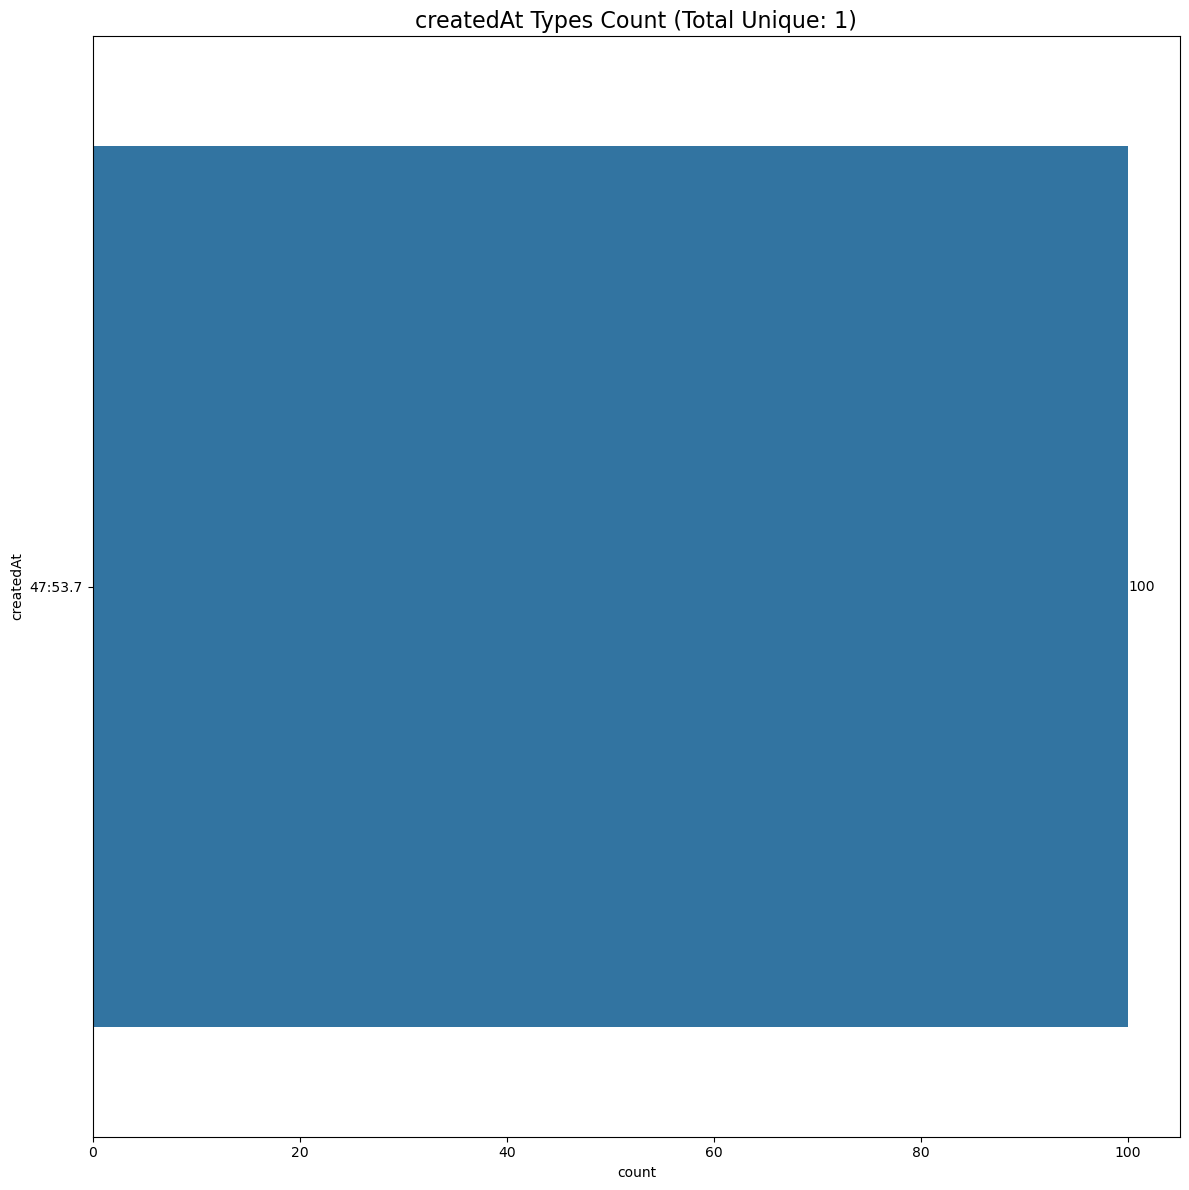

In [4]:
# Get the number of unique createdAt
n_createdAt = df['createdAt'].nunique()

# Print the number of unique createdAt
print(f"Number of unique createdAt: {n_createdAt}")

# Calculate an appropriate figure height (e.g., 0.4 inches per counterParty)
fig_height = max(12, n_createdAt * 0.4)  # Minimum height of 12 inches

# Countplot of createdAt types
plt.figure(figsize=(12, fig_height))
ax = sns.countplot(y=df['createdAt'], order=df['createdAt'].value_counts().index)
plt.title(f"createdAt Types Count (Total Unique: {n_createdAt})", fontsize=16)

# Increase font size for y-axis labels
plt.yticks(fontsize=10)

# Add count labels to the bars
for i, v in enumerate(df['createdAt'].value_counts()):
    ax.text(v, i, str(v), va='center', fontsize=10)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Save the figure before showing it
plt.savefig('createdAt Types Count.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

Number of unique externalId: 100


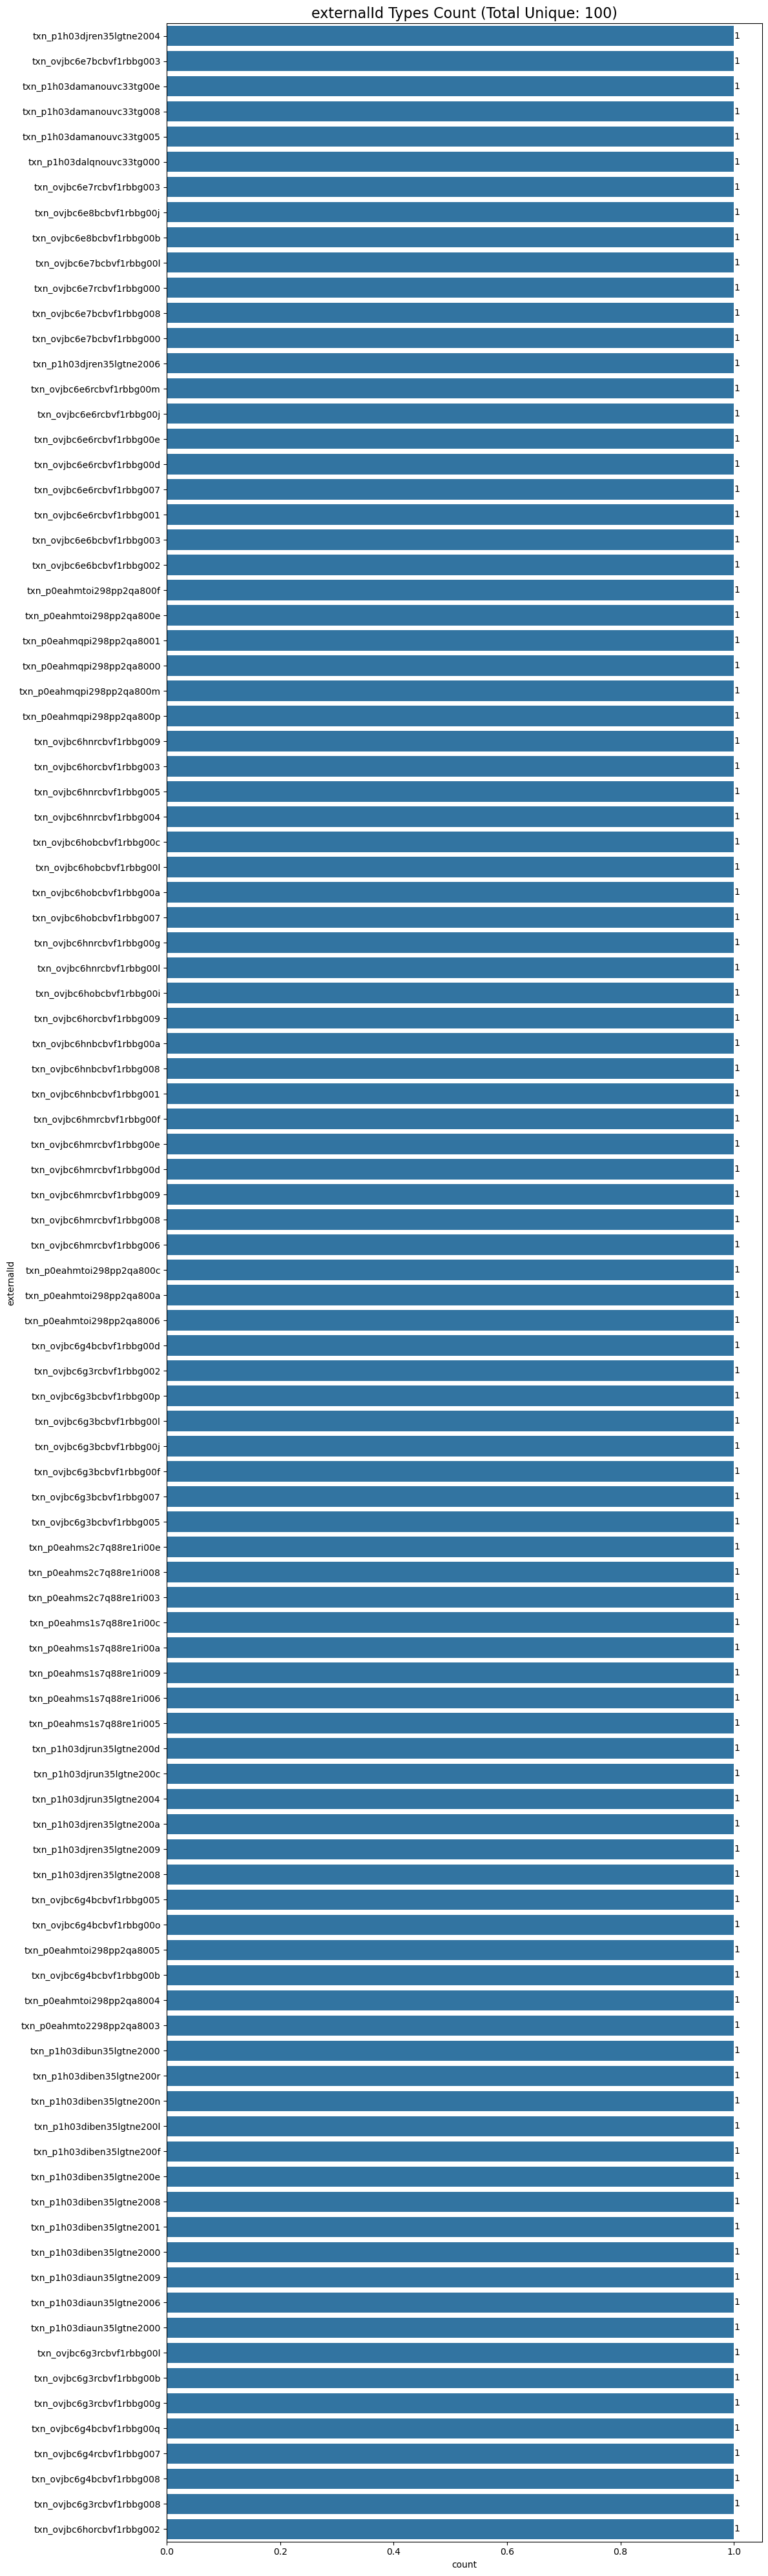

In [5]:
# Get the number of unique externalId
n_externalId = df['externalId'].nunique()

# Print the number of unique externalId
print(f"Number of unique externalId: {n_externalId}")

# Calculate an appropriate figure height (e.g., 0.4 inches per counterParty)
fig_height = max(12, n_externalId * 0.4)  # Minimum height of 12 inches

# Countplot of externalId types
plt.figure(figsize=(12, fig_height))
ax = sns.countplot(y=df['externalId'], order=df['externalId'].value_counts().index)
plt.title(f"externalId Types Count (Total Unique: {n_externalId})", fontsize=16)

# Increase font size for y-axis labels
plt.yticks(fontsize=10)

# Add count labels to the bars
for i, v in enumerate(df['externalId'].value_counts()):
    ax.text(v, i, str(v), va='center', fontsize=10)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Save the figure before showing it
plt.savefig('externalId Types Count.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

Number of unique date: 76


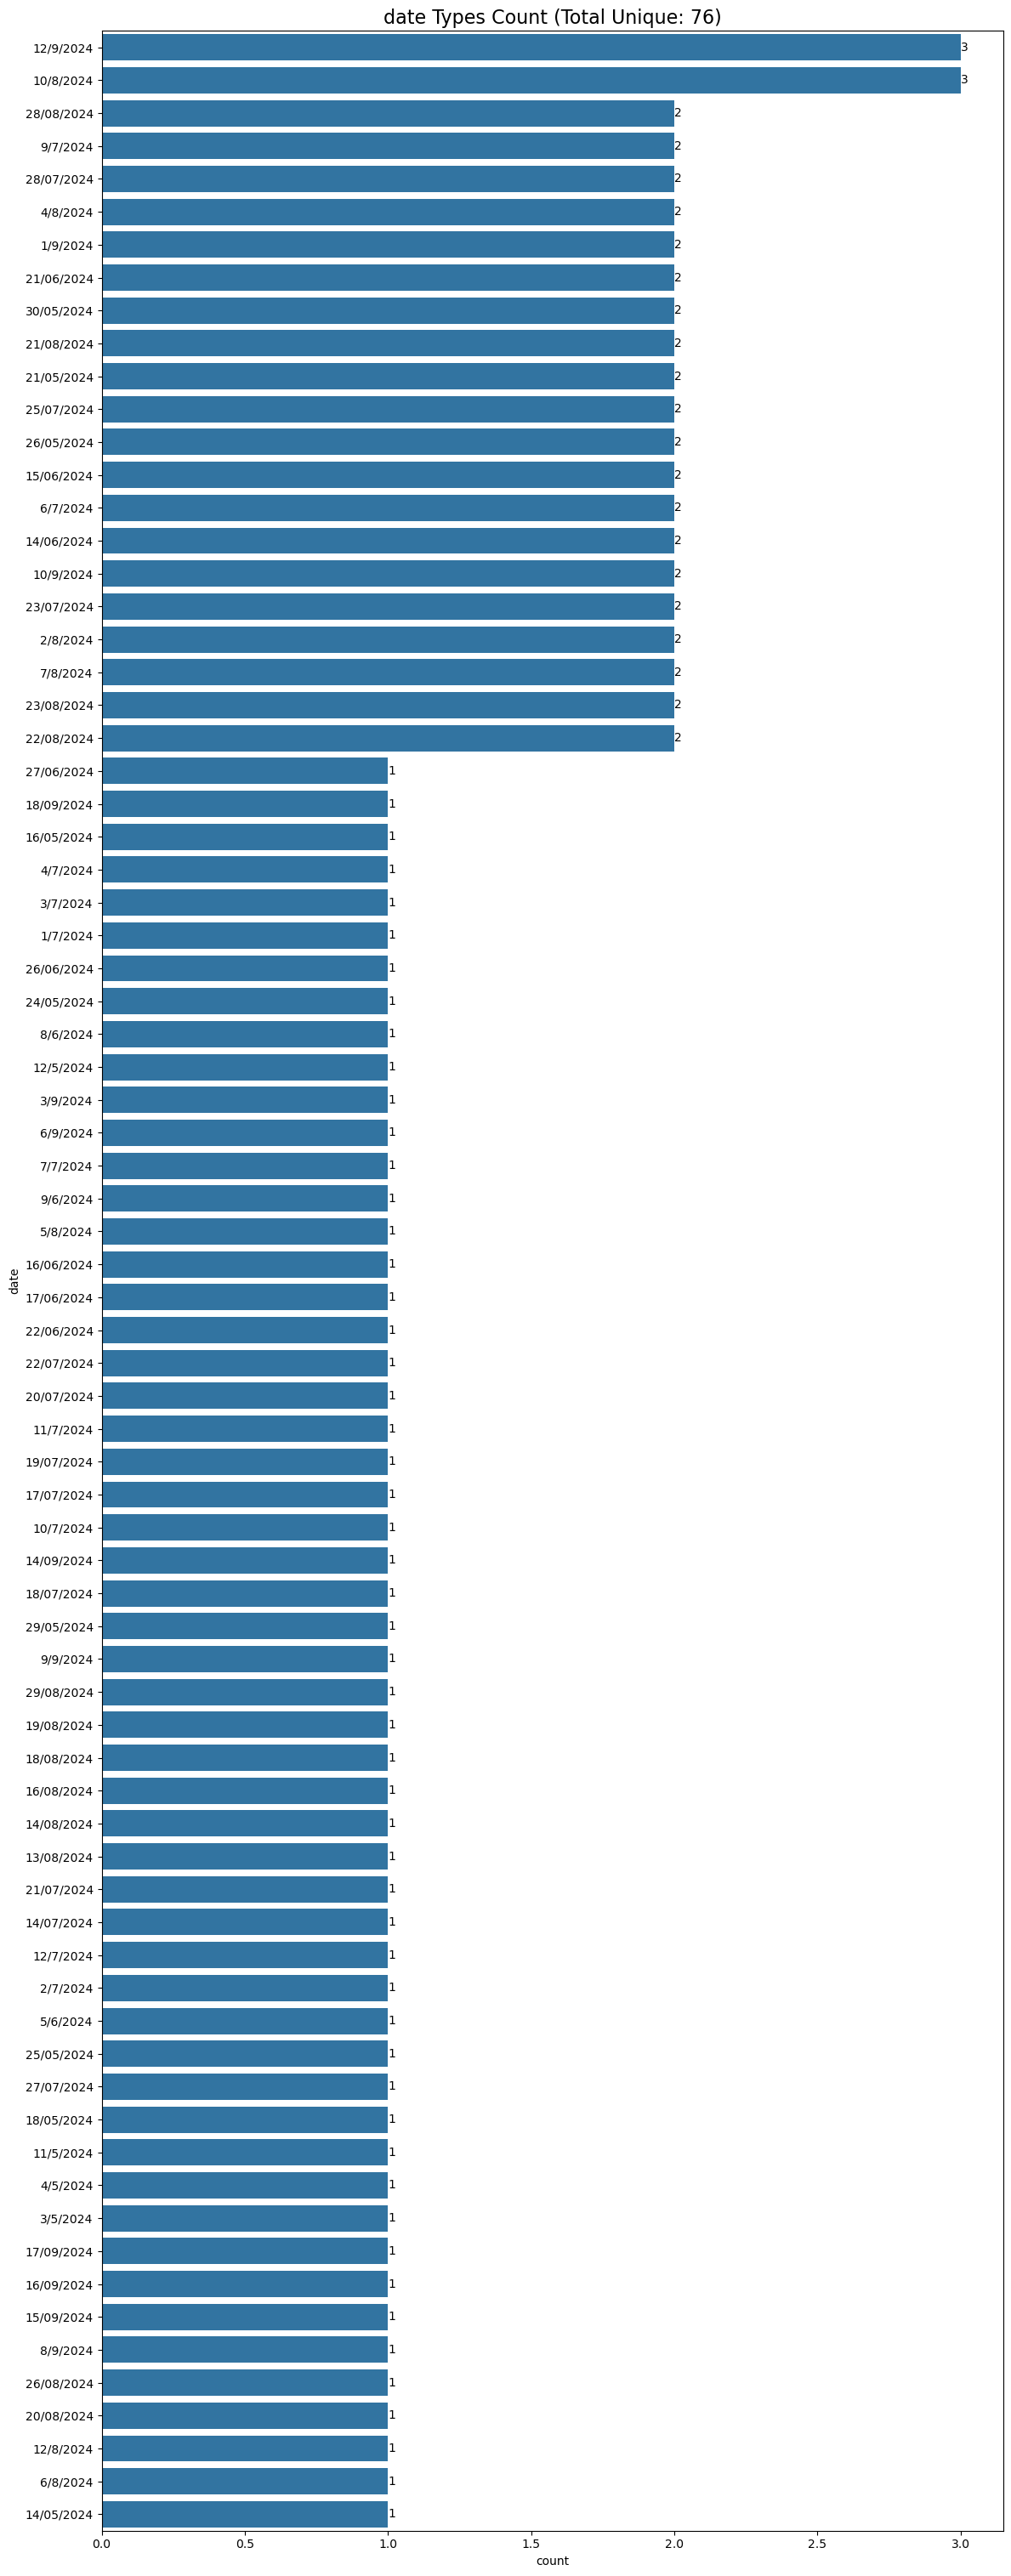

In [6]:
# Get the number of unique date
n_date = df['date'].nunique()

# Print the number of unique date
print(f"Number of unique date: {n_date}")

# Calculate an appropriate figure height 
fig_height = max(12, n_date * 0.4)  # Minimum height of 12 inches

# Countplot of date types
plt.figure(figsize=(12, fig_height))
ax = sns.countplot(y=df['date'], order=df['date'].value_counts().index)
plt.title(f"date Types Count (Total Unique: {n_date})", fontsize=16)

# Increase font size for y-axis labels
plt.yticks(fontsize=10)

# Add count labels to the bars
for i, v in enumerate(df['date'].value_counts()):
    ax.text(v, i, str(v), va='center', fontsize=10)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Save the figure before showing it
plt.savefig('date Types Count.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

Number of unique description: 57


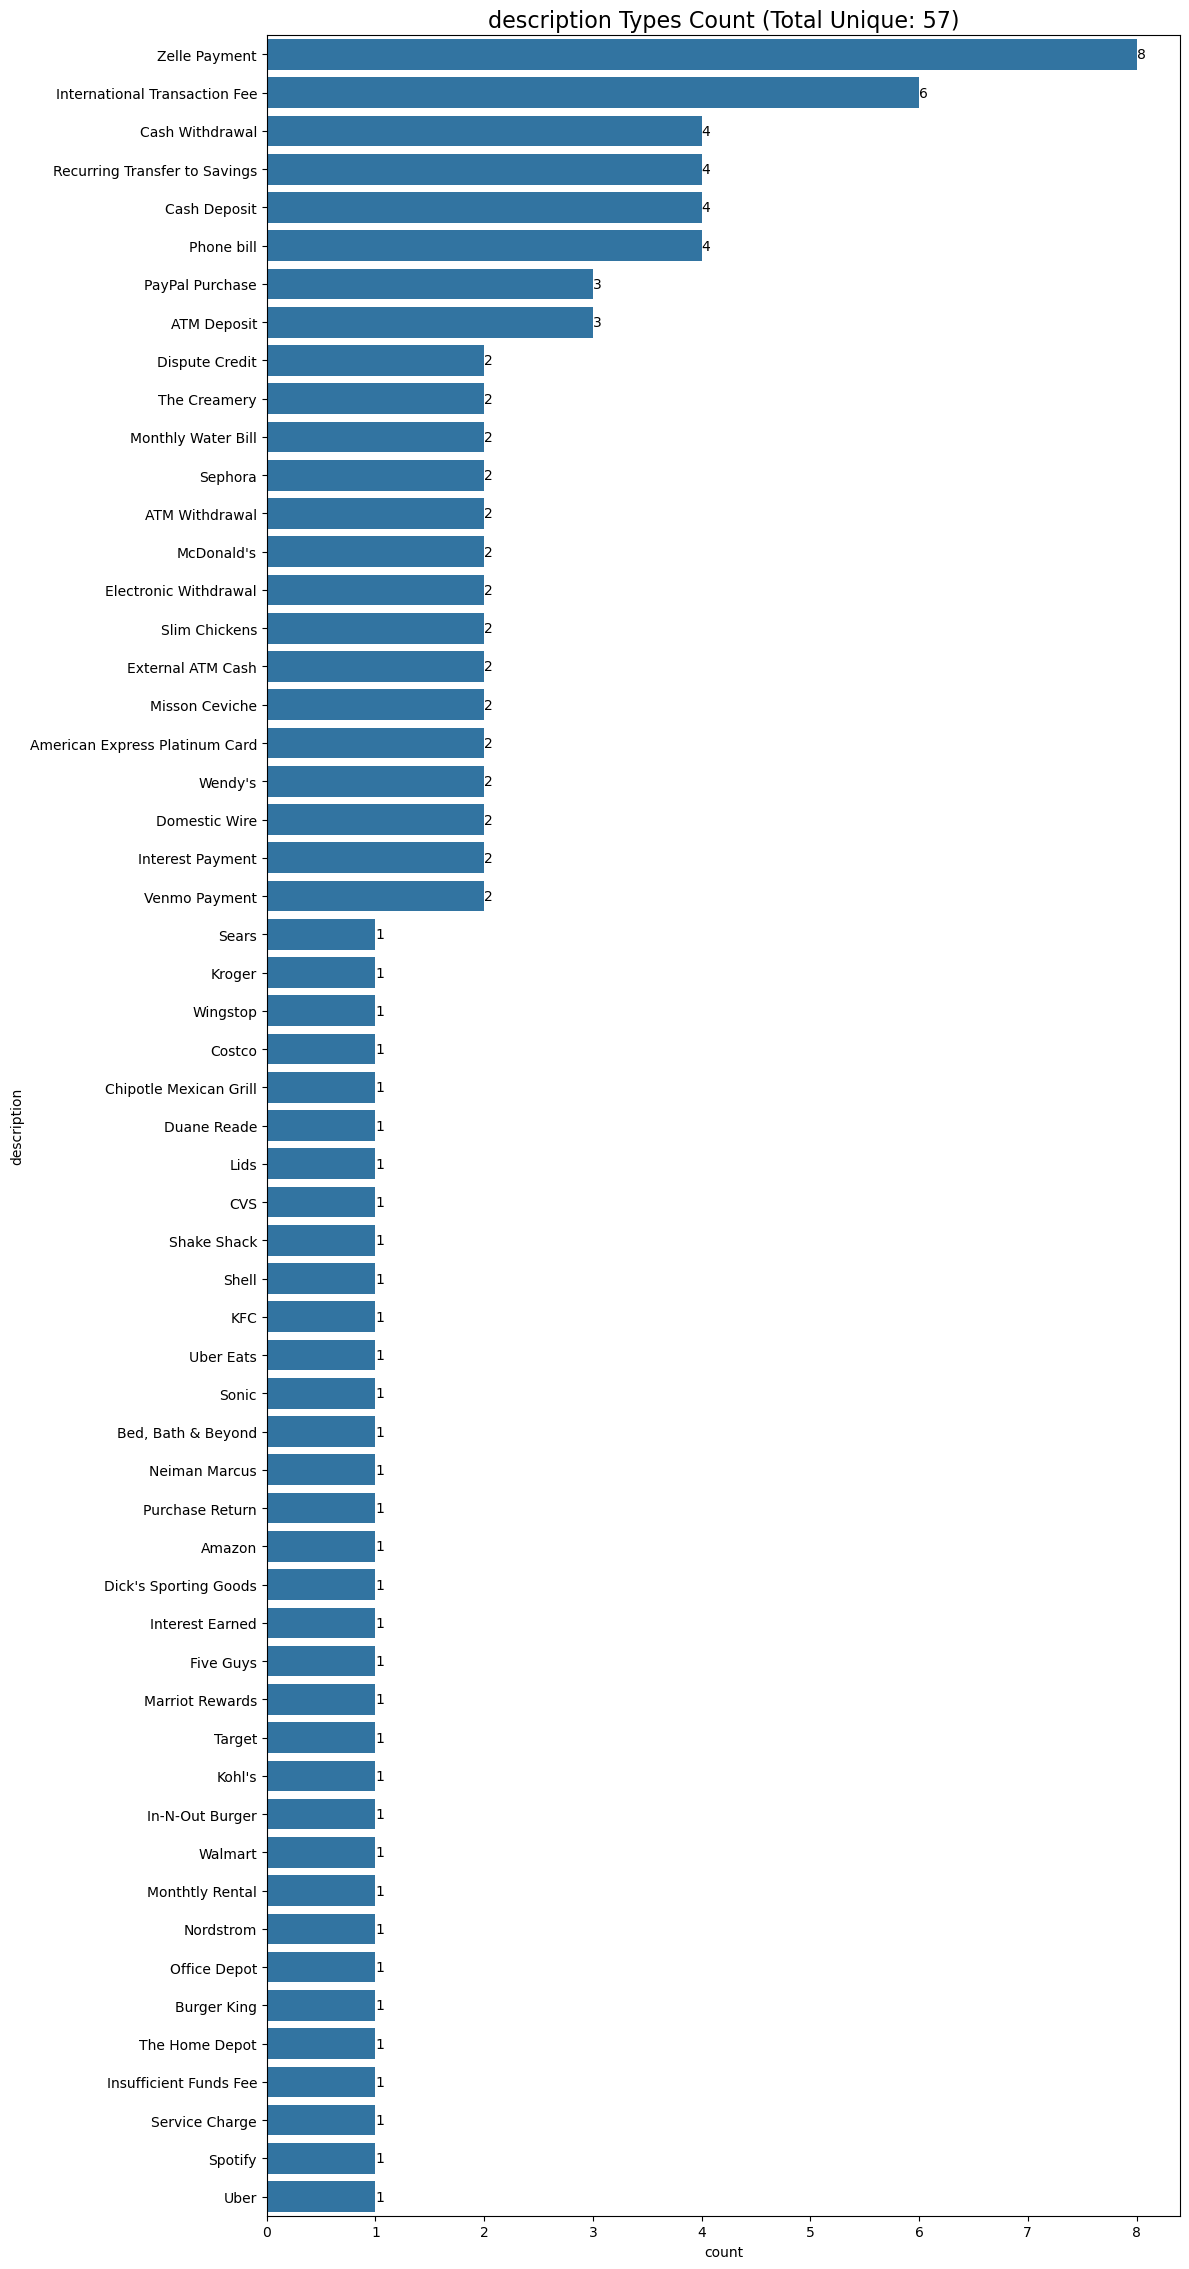

In [7]:
# Get the number of unique description
n_description = df['description'].nunique()

# Print the number of unique description
print(f"Number of unique description: {n_description}")

# Calculate an appropriate figure height 
fig_height = max(12, n_description * 0.4)  # Minimum height of 12 inches

# Countplot of description types
plt.figure(figsize=(12, fig_height))
ax = sns.countplot(y=df['description'], order=df['description'].value_counts().index)
plt.title(f"description Types Count (Total Unique: {n_description})", fontsize=16)

# Increase font size for y-axis labels
plt.yticks(fontsize=10)

# Add count labels to the bars
for i, v in enumerate(df['description'].value_counts()):
    ax.text(v, i, str(v), va='center', fontsize=10)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Save the figure before showing it
plt.savefig('description Types Count.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

Number of unique tag: 3


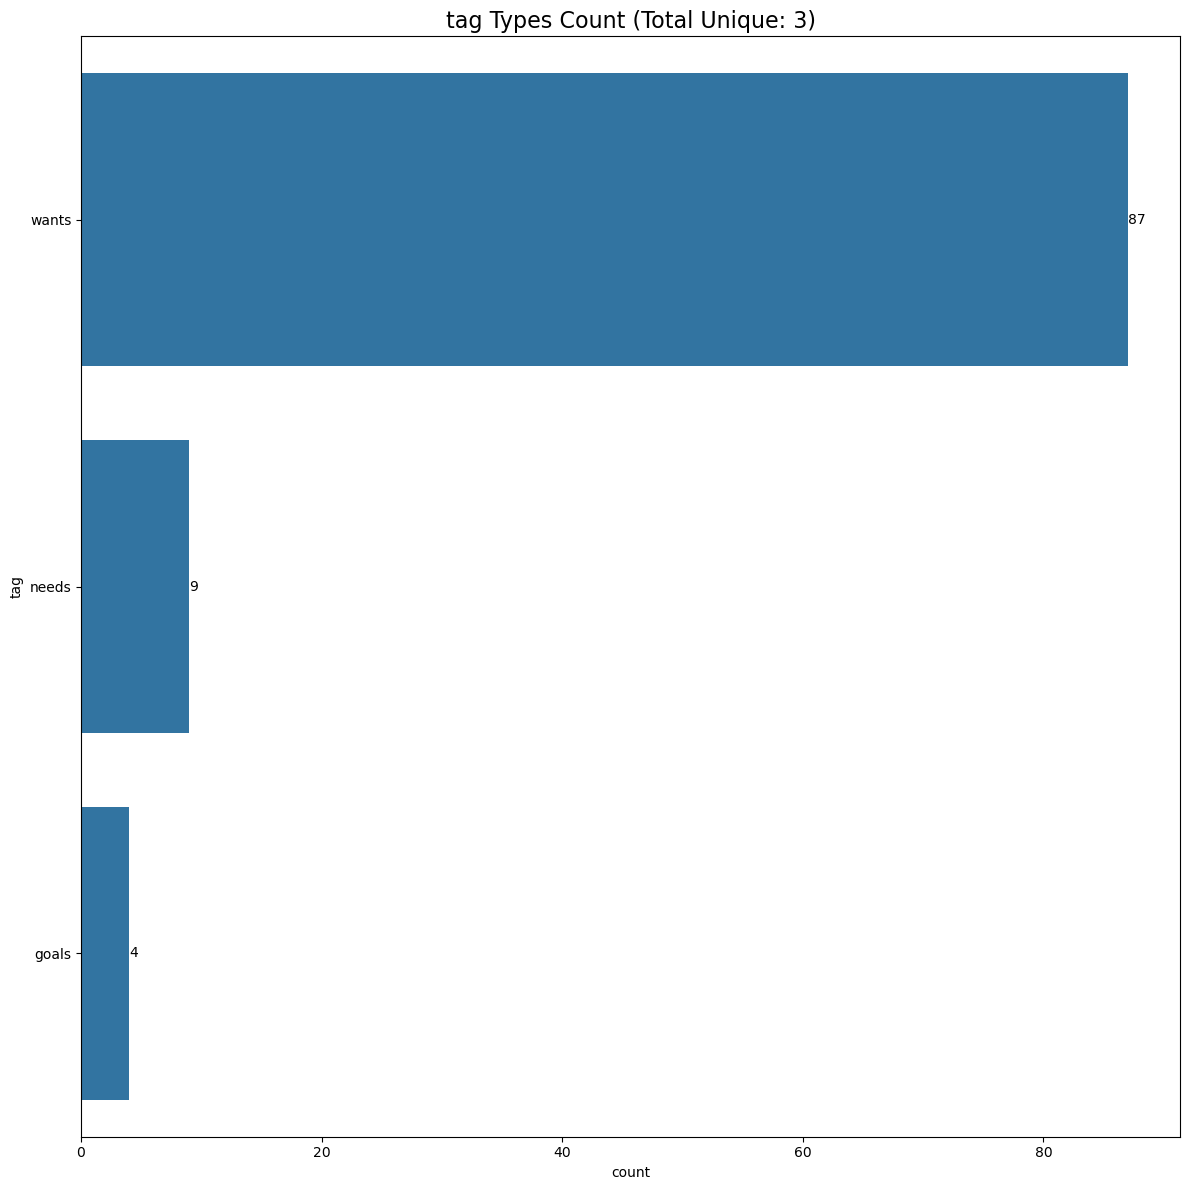

In [8]:
# Get the number of unique tag
n_tag = df['tag'].nunique()

# Print the number of unique tag
print(f"Number of unique tag: {n_tag}")

# Calculate an appropriate figure height 
fig_height = max(12, n_tag * 0.4)  # Minimum height of 12 inches

# Countplot of description types
plt.figure(figsize=(12, fig_height))
ax = sns.countplot(y=df['tag'], order=df['tag'].value_counts().index)
plt.title(f"tag Types Count (Total Unique: {n_tag})", fontsize=16)

# Increase font size for y-axis labels
plt.yticks(fontsize=10)

# Add count labels to the bars
for i, v in enumerate(df['tag'].value_counts()):
    ax.text(v, i, str(v), va='center', fontsize=10)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Save the figure before showing it
plt.savefig('tag Types Count.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

Number of unique tag: 3


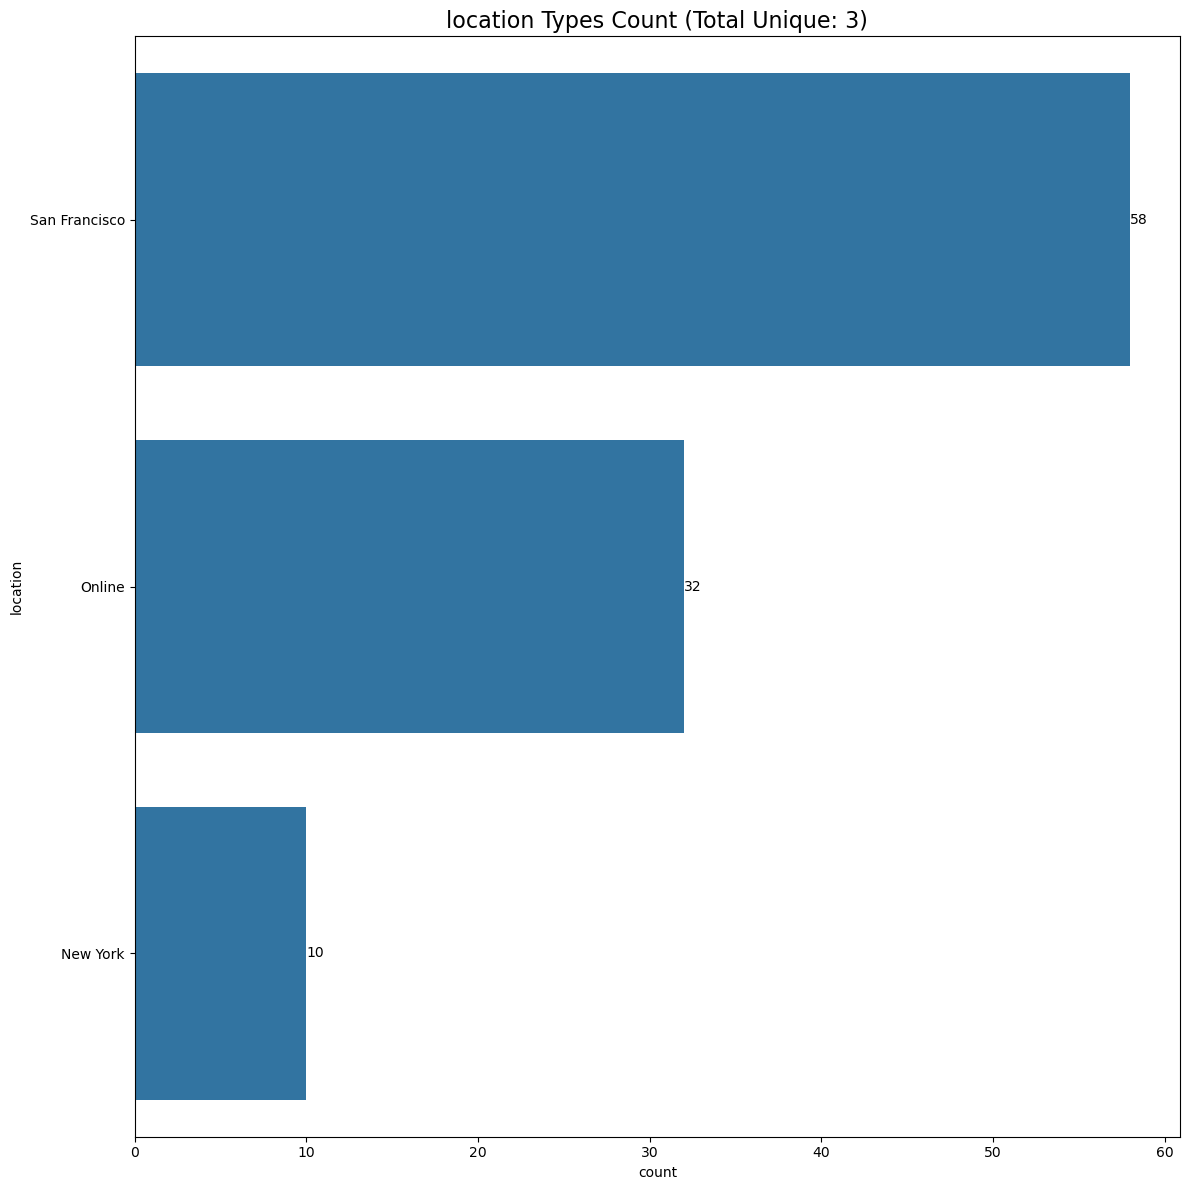

In [9]:
# Get the number of unique location
n_location = df['location'].nunique()

# Print the number of unique location
print(f"Number of unique tag: {n_location}")

# Calculate an appropriate figure height 
fig_height = max(12, n_location * 0.4)  # Minimum height of 12 inches

# Countplot of location types
plt.figure(figsize=(12, fig_height))
ax = sns.countplot(y=df['location'], order=df['location'].value_counts().index)
plt.title(f"location Types Count (Total Unique: {n_location})", fontsize=16)

# Increase font size for y-axis labels
plt.yticks(fontsize=10)

# Add count labels to the bars
for i, v in enumerate(df['location'].value_counts()):
    ax.text(v, i, str(v), va='center', fontsize=10)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Save the figure before showing it
plt.savefig('location Types Count.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

Number of unique id: 100


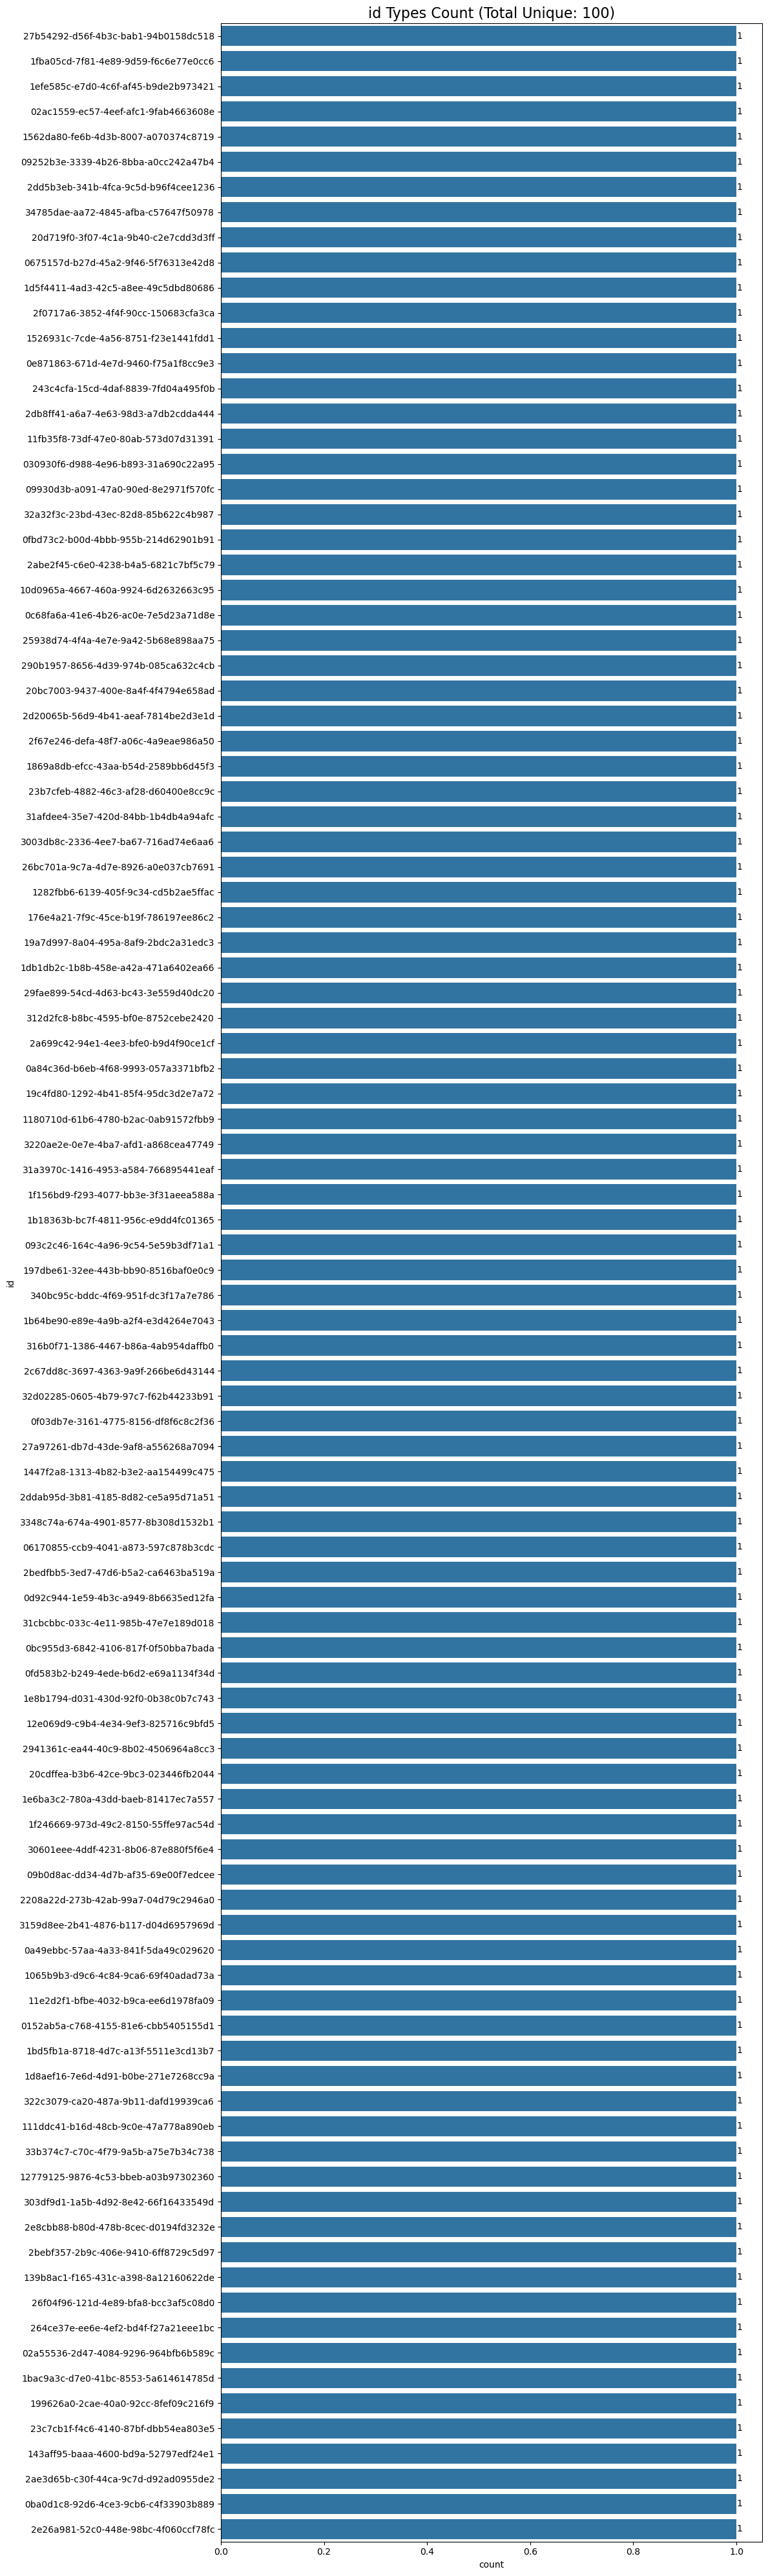

In [10]:
# Get the number of unique id
n_id = df['id'].nunique()

# Print the number of unique id
print(f"Number of unique id: {n_id}")

# Calculate an appropriate figure height 
fig_height = max(12, n_id * 0.4)  # Minimum height of 12 inches

# Countplot of location types
plt.figure(figsize=(12, fig_height))
ax = sns.countplot(y=df['id'], order=df['id'].value_counts().index)
plt.title(f"id Types Count (Total Unique: {n_id})", fontsize=16)

# Increase font size for y-axis labels
plt.yticks(fontsize=10)

# Add count labels to the bars
for i, v in enumerate(df['id'].value_counts()):
    ax.text(v, i, str(v), va='center', fontsize=10)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Save the figure before showing it
plt.savefig('id Types Count.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()